# Predicción del precio de casas en Boston con una red neuronal

Problema de regresión, predicción del precio de casas de Boston,
el dataset viene en la librería de sklearn

In [ ]:
# Importando las librerías a utilizar
import pandas as pd # Pandas para dataframes
import numpy as np # Para operaciones matmáticas
import matplotlib.pylab as plt # Para gráficas
plt.style.use("ggplot")
import seaborn as sns # También para gráficas

# Librerías de sklearn
from sklearn.datasets import load_boston # Para obetener el dataset
from sklearn import preprocessing # preprocesamiento 
from sklearn.metrics import r2_score # Métrica
from sklearn.model_selection import train_test_split

# Librerías de Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# Importando el dataset
dataset = load_boston()

In [ ]:
# Llaves de la clase load_boston que pertenece a sklearn.datasets
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])



*   data: datos
*   taget: variable objetivo
*   feature_names: nombres de las columnas
*   DESCR: descripción del dataset





In [ ]:
# significado de cada atributo y la variable objetivo
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* "Tasa de incidencia de delitos por unidad de población por ciudad"
"CRIM",
* "Porcentaje de casa de 25000 pies cuadrados de área"
'ZN',
* "Porcentaje de superficie de suelo no comercial por municipio"
'INDUS',
* "Índice para el río Charlse: 0 está cerca, 1 está lejos"
'CHAS',
* "Concentración de compuestos de nitrógeno"
'NOX',
* "Número medio de habitaciones por residencia"
'RM',
* "Porcentaje de edificios construidos antes de 1940"
'AGE',
* "Distancia ponderada de cinco centros de empleo"
"DIS",
* "Índice para un fácil acceso a la autopista"
'RAD',
* "Tasa de impuestos por $ 100,000"
'TAX',
* "Porcentaje de alumnos y profesores de cada municipio"
'PTRATIO',
* "1000 (Bk - 0.63) ^ 2, donde Bk es el porcentaje de personas negras"
'B',
* "Porcentaje de población de clase baja"
'LSTAT',

In [ ]:
# Creamos un dataframe de pandas con los datos y nombres de las aolcumnas
cols = dataset.feature_names 
df = pd.DataFrame(dataset.data,columns=cols) # datos # Nombres de columnas
df["PRECIOS"] = dataset.target # Variable objetivo que son los precios de casas
df.head() # Muestra del dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRECIOS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


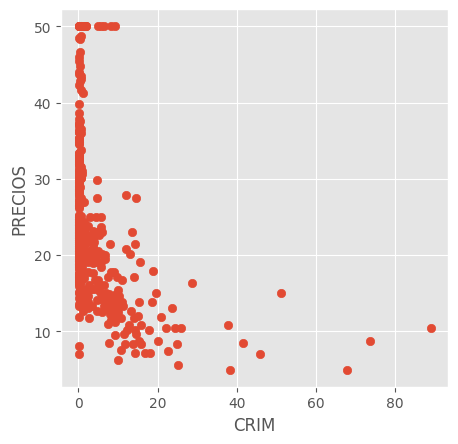

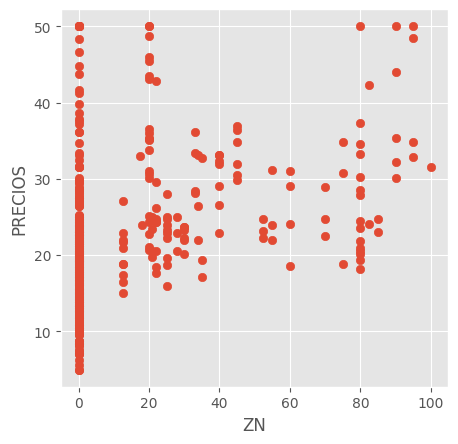

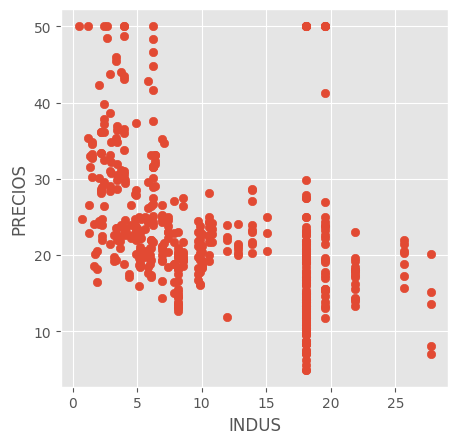

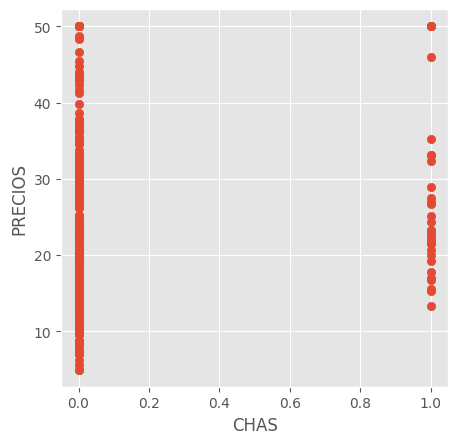

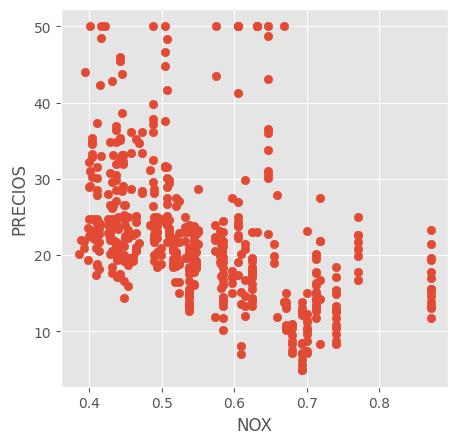

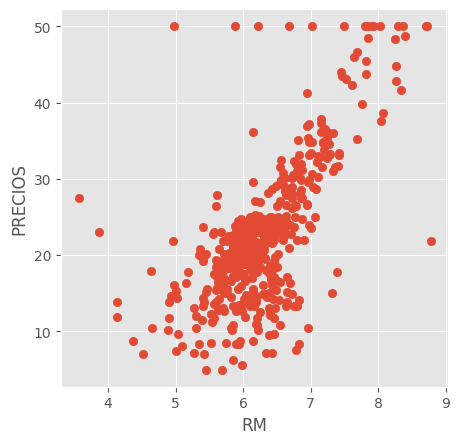

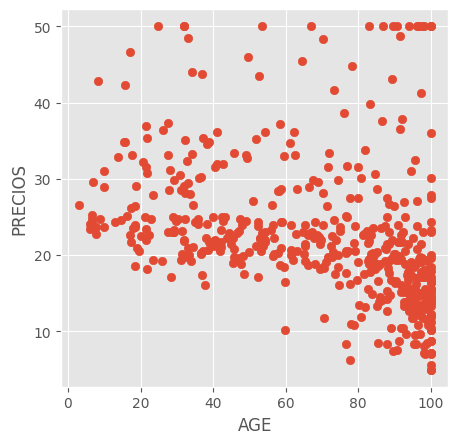

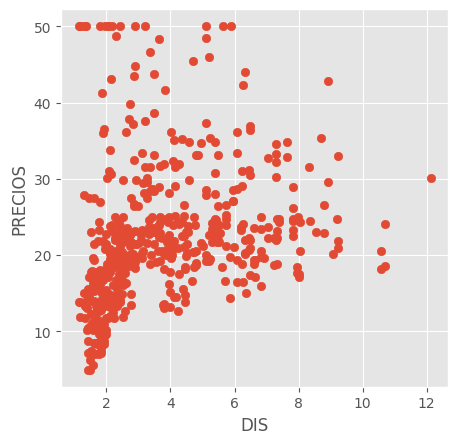

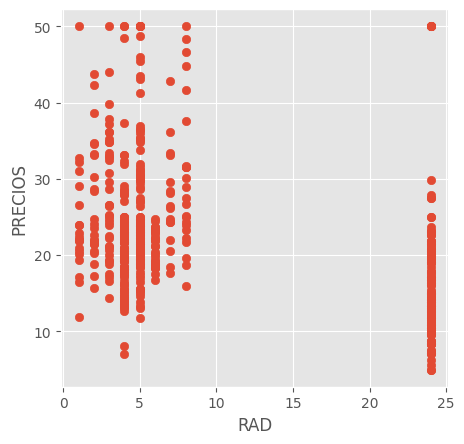

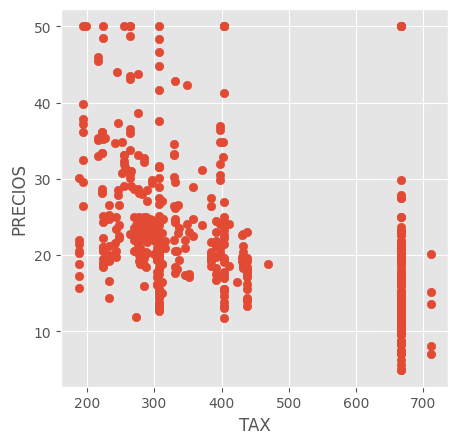

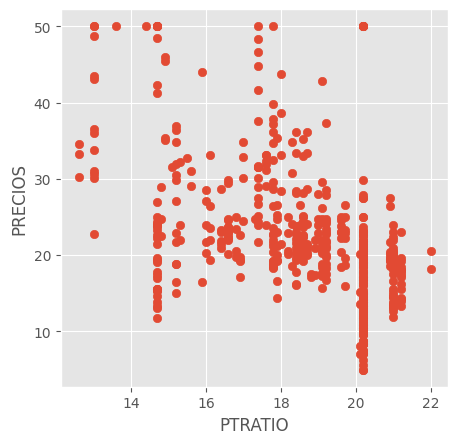

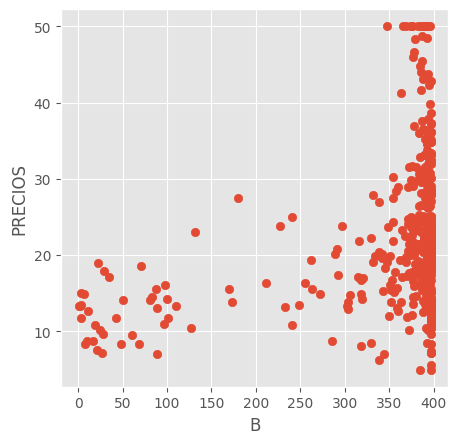

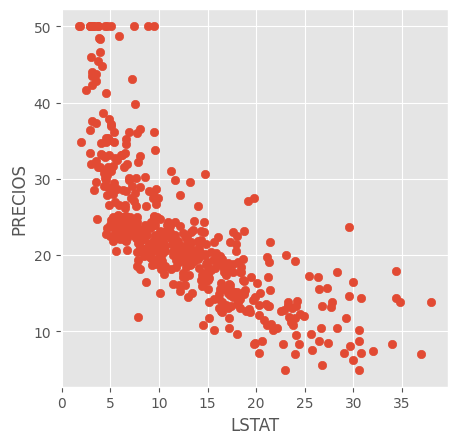

In [ ]:
# Gráficas de los atributos vs los precios
for i in df.columns.tolist()[:-1]:
  plt.figure(figsize=(5, 5), dpi=100)
  plt.scatter(x=df[i], y=df["PRECIOS"])
  plt.ylabel("PRECIOS")
  plt.xlabel(i)
  plt.show()

In [ ]:
# Definiendo la variable objetivo y las características del dataset
TargetName = "PRECIOS"
FeaturesName = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [ ]:
X = df[FeaturesName]
Y = df[TargetName]

Se necesita estandarizar las variables numéricas en el análisis de redes neuronales. Esto se debe a que la magnitud de cada variable afecta su escala de parámetros en una red neuronal. Por tanto, la diferencia en la escala de las variables dificultaría el entrenamiento del modelo. Entonces restamos su media y
dividemos entre su desviación estándar, esto se puede hacer utilizando la librería sklearn.

In [ ]:
sscaler = preprocessing.StandardScaler()
sscaler.fit(X)
X_std = sscaler.transform(X)

In [ ]:
# Dividimos el conjunto de datos en datos de entrenamiento y datos de prueba.
# con u porcentaje de entramiento de 80%y prueba de 20%
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=99)

In [ ]:
# Definimos un modelo de red neuronal ocon tres capas.

class NeuralNetwork(nn.Module):
        # Se definen las capas que se van a usar
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            # Primera capa: tamaños de entrada y salida son 13 y 32
            self.layer1 = nn.Linear(X.shape[1], 32)
            self.layer2 = nn.Linear(32, 16)
            self.layer3 = nn.Linear(16, 1)
        # Estructura de la red, donde se aplica la funció de activación RELU
        def forward(self, x):
            x = F.relu( self.layer1(x) )
            x = F.relu( self.layer2(x) )
            x = self.layer3(x)

            return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
)


In [ ]:
# Tenemos que convertir explícitamente la matriz NumPy (o pandas DataFrame) en un tenso
x = torch.tensor(np.array(X_train), dtype=torch.float)
y = torch.tensor(np.array(Y_train).reshape(-1, 1), dtype=torch.float)

In [ ]:
# Definimos un optimizador. PyTorch cubre muchos algoritmos de optimización. 
# Los populares y básicos son SGD y Adam (optimizer = optim.Adam(model.parameters(), lr=0.005))
# , donde se le pasan los parámetros del modelo
# y la tasa de aprendizaje. 
optimizer = optim.SGD(model.parameters(), lr=0.005)

Definimos una función de pérdida. PyTorch cubre muchos tipos de funciones de pérdida. Aquí, usamos el error cuadrático medio como una función de pérdida.

In [ ]:
loss_function = nn.MSELoss()

Se entrena el modelo, en cada epoch inicializa el gradiente de los parámetrps,
calcula la pérdida y actualiza los parámetros del modelo.

In [ ]:
# Tomamaos 200 épocas
epochs = 200

for i in range(epochs):
    # initialize the gradient of model parameters
    optimizer.zero_grad()

    # calculate the loss
    y_val = model(x)
    loss = loss_function(y_val, y)
    # Backpropagation
    loss.backward()
    # Update parameters
    optimizer.step()
    if (i % 5) == 0:
      print('epoch: {},'.format(i) + 'loss: {:.5f}'.format(loss))

epoch: 0,loss: 579.86871
epoch: 5,loss: 364.82294
epoch: 10,loss: 27.11491
epoch: 15,loss: 22.52196
epoch: 20,loss: 25.95798
epoch: 25,loss: 24.91874
epoch: 30,loss: 30.95242
epoch: 35,loss: 22.95060
epoch: 40,loss: 27.09146
epoch: 45,loss: 20.34000
epoch: 50,loss: 23.26694
epoch: 55,loss: 18.05835
epoch: 60,loss: 20.14552
epoch: 65,loss: 16.30927
epoch: 70,loss: 17.75924
epoch: 75,loss: 14.97903
epoch: 80,loss: 16.14025
epoch: 85,loss: 13.95281
epoch: 90,loss: 14.91285
epoch: 95,loss: 13.08743
epoch: 100,loss: 13.83880
epoch: 105,loss: 12.38699
epoch: 110,loss: 13.04296
epoch: 115,loss: 11.85587
epoch: 120,loss: 12.39653
epoch: 125,loss: 11.35056
epoch: 130,loss: 11.79321
epoch: 135,loss: 10.86748
epoch: 140,loss: 11.22024
epoch: 145,loss: 10.49935
epoch: 150,loss: 10.87818
epoch: 155,loss: 10.27354
epoch: 160,loss: 10.64128
epoch: 165,loss: 10.07905
epoch: 170,loss: 10.46425
epoch: 175,loss: 9.92360
epoch: 180,loss: 10.30984
epoch: 185,loss: 9.77238
epoch: 190,loss: 10.14869
epoch: 1

In [ ]:
# Para validar el rendimiento del modelo, predecimos los datos de entrenamiento y test.
# Primero convertimos a tensor
Y_train_pred = model(torch.tensor(X_train, dtype=torch.float))
Y_test_pred = model(torch.tensor(X_test, dtype=torch.float))

# Convert into numpy array
Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

Se caculas las métricas usando r2_score de sklearn

In [ ]:
# from sklearn.metrics import r2_score
R2 = r2_score(Y_test, Y_test_pred)
print(R2)

0.8011663642533099


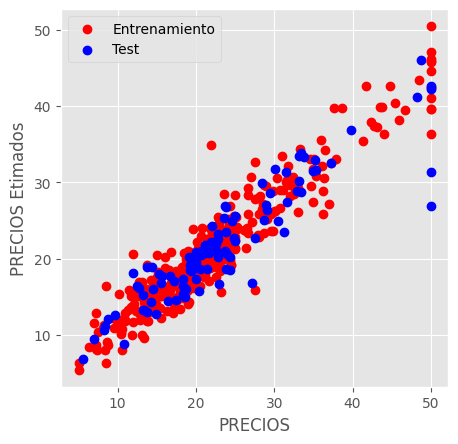

In [ ]:
# Preciso estimados
plt.figure(figsize=(5, 5), dpi=100)
plt.xlabel("PRECIOS")
plt.ylabel("PRECIOS Etimados")
plt.scatter(Y_train, Y_train_pred, lw=1, color="r", label="Entrenamiento")
plt.scatter(Y_test, Y_test_pred, lw=1, color="b", label="Test")
plt.legend()
plt.show()